# WeatherPy
----

### Analysis
* The temperature is at the highest between 0 and 20 latitude, when the latitude starts to increase, the temperature decreases. At latitudes below 0, the temperature stays fairly high but starts to decrease as the latitude gets farther away from 0.
* Latitude does not have much of an effect on cloudiness, wind speed, or humidity. 
* Humidity values are mostly high, with many close to 100. Cloudiness values are more spread from 0 to 100, but more values tend to be closer to 0. Most wind speed values are 10 or under, with very few wind speeds being above 25.

---



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query = f"{url}appid={api_key}&units={units}&q="
latitude = []
temperature = []
humidity = []
wind_speed = []
cloudiness = []
print(f"Beginning Data Retrieval")
print("------------------------------")  
for city in cities:
    response = requests.get(query + city).json()    
    try:
        latitude.append(response['coord']['lat'])
        temperature.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        print(response['name'])
    except KeyError:
        latitude.append(np.nan)
        temperature.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        cloudiness.append(0)
        print(f"City not found. Skipping...")
        
print("-------------------------------")
print(f"End Data Retrieval")


    







Beginning Data Retrieval
------------------------------
La Ronge
Anito
City not found. Skipping...
Jamestown
Thompson
Torbay
Djibo
Ribeira Grande
Caldwell
City not found. Skipping...
Bathsheba
Bluff
Mataura
Albany
Hidalgo
City not found. Skipping...
Voznesenye
Srednekolymsk
City not found. Skipping...
Busselton
Yellowknife
Saint-Philippe
Christchurch
Port Hardy
Ushuaia
Huilong
Burnie
Tura
Qaanaaq
Mount Isa
Castro
Totness
Morwell
Kaeo
Lata
City not found. Skipping...
Mahebourg
Zarand
Stephenville
City not found. Skipping...
Barrow
Broken Hill
Fort Nelson
Narsaq
Taoudenni
Okha
Hambantota
Kerema
Cedar Rapids
Necochea
Atuona
Rikitea
Nome
Galle
Bredasdorp
Kalmunai
Meulaboh
Boa Vista
Kaitangata
Vaini
San Ramon
Port Elizabeth
Kokopo
Norman Wells
Port Lincoln
Mar del Plata
City not found. Skipping...
Jalu
Manzil Salim
Jacmel
Chuy
Punta Arenas
Liverpool
City not found. Skipping...
Khatanga
Takayama
Dikson
Warrnambool
Vanimo
Batie
Kendari
Esperance
Bambous Virieux
Cayenne
Davila
Port Blair
Aitap

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weatherdata = {"City": cities, "Latitude": latitude, 
                          "Temperature": temperature, "Humidity": humidity, 
                          "Wind Speed": wind_speed, "Cloudiness": cloudiness}
weatherdf = pd.DataFrame.from_dict(weatherdata, orient='index')
weatherfinal = weatherdf.transpose()
weatherfinal.to_csv('weatherdata.csv')

In [7]:
weatherfinal.head()

,City,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,la ronge,55.1,-36.41,73,2.24,20
1,anito,12.45,77.42,100,20.8,100
2,vaitupu,NaN,NaN,NaN,NaN,0
3,jamestown,-33.21,63.74,60,9.95,68
4,thompson,55.74,-40.01,65,4.7,5


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

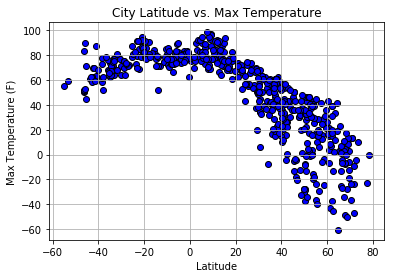

In [12]:
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.scatter(latitude,temperature, marker="o", facecolors="blue", edgecolors="black")
plt.savefig("D:\\/LatvsTempPlot")
plt.show()

#### Latitude vs. Humidity Plot

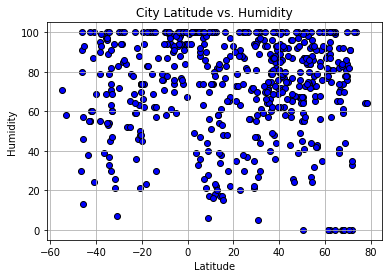

In [13]:
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()
plt.scatter(latitude,humidity, marker="o", facecolors="blue", edgecolors="black")
plt.savefig("D:\\/LatvsHumidityPlot")
plt.show()

#### Latitude vs. Cloudiness Plot

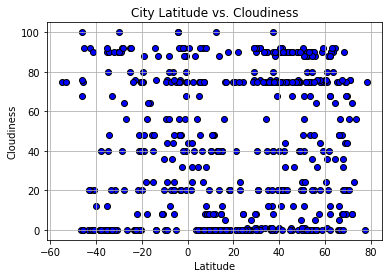

In [14]:
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()
plt.scatter(latitude,cloudiness, marker="o", facecolors="blue", edgecolors="black")
plt.savefig("D:\\/LatvsCloudinessPlot")
plt.show()


#### Latitude vs. Wind Speed Plot

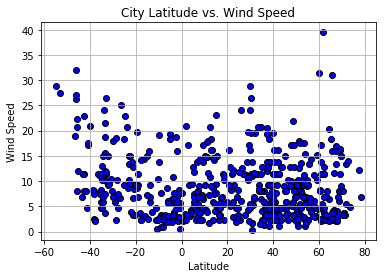

In [15]:
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.scatter(latitude,wind_speed, marker="o", facecolors="blue", edgecolors="black")
plt.savefig("D:\\/LatvsSpeedPlot")
plt.show()